#### Table of contents 
#### 1.Getting to know the Data 
    1.Metadata
    2.Cleaning the Data
#### 2.Product Analysis 
#### 3.Segment Analysis 
#### 4.Geographical Analysis 
#### 5.Conclusion  Actionable Insights 

In [91]:
from matplotlib import ticker as mtick
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
df=pd.read_excel("E:\software\Sample - Superstore.xlsx")
df

E:\software\anaconda\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2017-110422,2017-01-21,2017-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


#### 2.Cleaning the Data 

In [92]:
#First lets clean the column names so it's all in snakecase and no whitespace.
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country/region', 'city',
       'state', 'postal_code', 'region', 'product_id', 'category',
       'sub-category', 'product_name', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')

In [93]:
#Dropping some redundant columns (for this analysis)
df = df.drop(columns=["row_id", "customer_name"])

In [94]:
#There is one duplicated entry in the dataset. Let's check it out
df[df.duplicated()]

,order_id,order_date,ship_date,ship_mode,customer_id,segment,country/region,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
3406,US-2017-150119,2017-04-23,2017-04-27,Standard Class,LB-16795,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [95]:
#Given the structure of the dataset I will assume that this is a faulty entry.
df = df.drop_duplicates()

#### 2. Product Analysis

Text(0.0, 1.0, 'Share of Total Profit by Category')

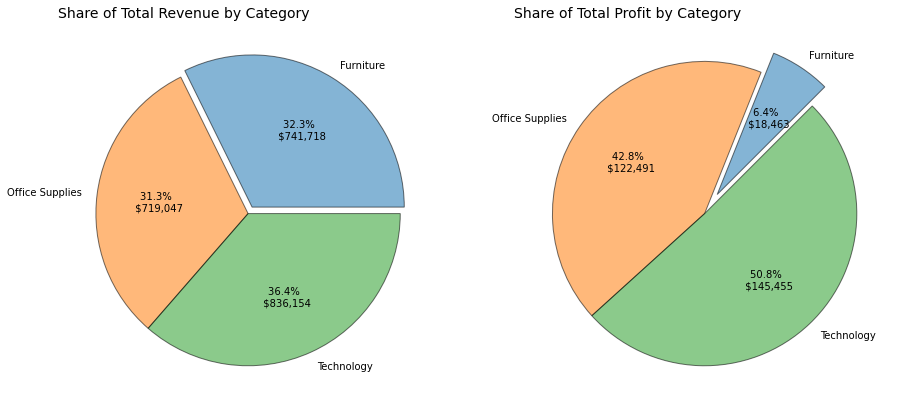

In [96]:
#Gruoping the data based on category.
sales_per_category = df.groupby("category").sum()

#Getting a list of colors. This will help other charts use the same colors given the label texts.
category_colors = ["tab:blue" if label == "Furniture" else "tab:orange" if label == "Office Supplies" else "tab:green" for label in sales_per_category.index]
    

fig, (ax1, ax2) = plt.subplots(figsize=(15, 15), ncols=2)

#Making a pie chart of sales per category.
ax1.pie(sales_per_category["sales"], labels=sales_per_category.index,
      autopct=lambda p:f"{p:.1f}% \n ${p*np.sum(sales_per_category['sales'])/100 :,.0f}",
      wedgeprops={"linewidth": 1, "edgecolor":"black", "alpha":0.55},
      colors=category_colors, explode=[0.05, 0, 0])

#Setting the title
ax1.set_title("Share of Total Revenue by Category", loc="left", fontdict={"fontsize":14})

#Making a pie chart of profit per category.
ax2.pie(sales_per_category["profit"], labels=sales_per_category.index,
       autopct=lambda p: f"{p:.1f}% \n ${p*np.sum(sales_per_category['profit'])/100 :,.0f}",
        startangle=45, wedgeprops={"linewidth": 1, "edgecolor":"black", "alpha":0.55},
        colors=category_colors, explode=[0.15, 0, 0])

#Setting the title.
ax2.set_title("Share of Total Profit by Category",loc="left", fontdict={"fontsize":14})

An interesting insight of the pie charts above is that sales are divided almost equally between the product categories. However, looking at each product category's share of the profit it becomes obvious that the margin on Furniture is quite low in comparision to Office Supplies and Technology.
Given this insight - let's take a look at the sub-categories and it's respective margin.

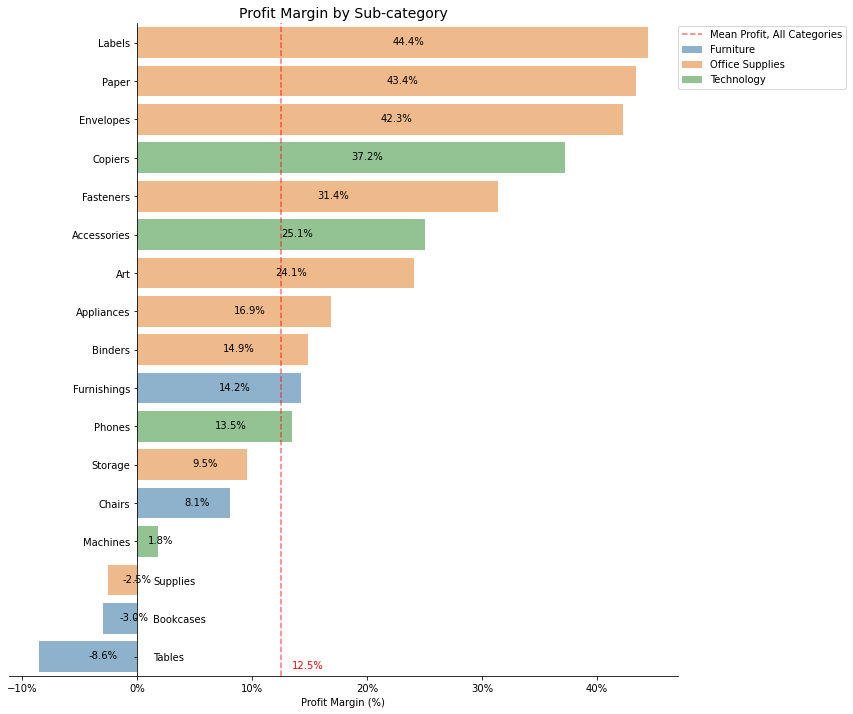

In [97]:
#Grouping the data on category and it's respective sub-categories. Calculating the profit margin.
sales_per_subcategory = df.groupby(["category", "sub-category"], as_index=False)[["sales", "profit"]].sum()
sales_per_subcategory["profit_margin"] = sales_per_subcategory["profit"] / sales_per_subcategory["sales"]

#Sorting the dataframe based on profit margin
sales_per_subcategory.sort_values(by="profit_margin", inplace=True, ascending=False)

fig, ax = plt.subplots(figsize=(12,12))

#Plotting the profit margin per sub-category.
sns.barplot(y=sales_per_subcategory["sub-category"], x=sales_per_subcategory["profit_margin"], hue=sales_per_subcategory["category"], 
            hue_order=["Furniture", "Office Supplies", "Technology"], alpha=0.55, dodge=False,
           ax=ax)
#Cleaning out bar junk
ax.spines["left"].set_position("zero")
ax.spines[["right","top"]].set_visible(False)
ax.set(ylabel=None, xlabel="Profit Margin (%)")


def move_ylabel_tick(index: list):
    """
    Moving the provided ylabel ticks
    """
    for tick in index:
        ax.get_yticklabels()[tick].set_x(0.02)
        ax.get_yticklabels()[tick].set_horizontalalignment("left")

#Moving the y-labels on sub-categories that are making a loss in order to prevent collision of the bar and the text.
move_ylabel_tick([-1, -2, -3])


#Annotating the profit margin amount for each bar.
for p in ax.patches:
    _, y = p.get_xy()
    
    ax.annotate(f"{p.get_width()*100 :.1f}%", (p.get_width() / 2, y+0.45))
    
#Calculating Superstore's aggregate profit margin in order to compare it to each sub-category's profit margin
mean_profit = sales_per_subcategory["profit"].sum() / sales_per_subcategory["sales"].sum()

#Plotting a vertical line and annotating the Superstore's aggregate profit margin.
ax.axvline(mean_profit, color="red", label="Mean Profit, All Categories", alpha=0.55, ls="--")
ax.text(x=mean_profit+0.01, y=len(sales_per_subcategory)-0.7, s=f"{mean_profit*100 :.1f}%", color="red")

#Setting the title and legend.
ax.set_title("Profit Margin by Sub-category", fontdict={"fontsize":14})
ax.legend(loc=(1, 0.9))

#Formatting the x-axis as %
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))


The bar chart above shows that the company has a very high margin (more than double the company's total margin) on a few of the sub-categories. Mainly within Office Supplies. Half of Technology's subcategories (2) also have a high margin.

The chart also confirms that the profit margin on the sub-categories within Furniture are low. Two of the sub-categories from Furniture are even being sold at a loss.

Given this, let's take a look at the items within the three sub-categories where the company is losing money.

In [98]:
#Creating a dataframe for each sub-category and it's respective products.
tables = df.groupby(["sub-category", "product_name"]).sum().loc["Tables",:]
bookcases = df.groupby(["sub-category", "product_name"]).sum().loc["Bookcases",:]
supplies = df.groupby(["sub-category", "product_name"]).sum().loc["Supplies",:]


def profit_margin(category_df):
    """
    Function to calculate the profit margin for all the provided dataframes
    """
    
    category_df["profit_margin"] = category_df["profit"] / category_df["sales"]
    
    category_df.sort_values(by="profit_margin", inplace=True, ascending=False)
    
    return category_df

#Calculating profit margin for all dataframes.
profit_margin(tables)
profit_margin(bookcases)
profit_margin(supplies)

#
def profitable_items(category_dict: dict):
    """
    Function to print the amount of items that have a higher profit margin than the company average
    """
    
    for df_name, df in category_dict.items():

        print(f"""{df_name} has {len(df[df['profit_margin'] > mean_profit])} items (out of {len(df)}) with a profit margin higher than the company average.""")
    
profitable_items({"Tables":tables, "Bookcases":bookcases, "Supplies":supplies})

Tables has 2 items (out of 56) with a profit margin higher than the company average.
Bookcases has 6 items (out of 50) with a profit margin higher than the company average.
Supplies has 23 items (out of 36) with a profit margin higher than the company average.


Using the company's total profit margin (12.5%, that we've seen before) as a benchmark I compare these non-profitable sub-categories. From the 3 sub-categories that this Superstore is selling at a loss, Tables and Bookcases are clearly categories where this store is struggling.

Suprisingly, a majority of Supplies items are being sold at a higher margin than the company average, thus these would actually be profit drivers for the company. Let's investigate even further by taking the top 15 items with the highest margins within each respective sub-category.

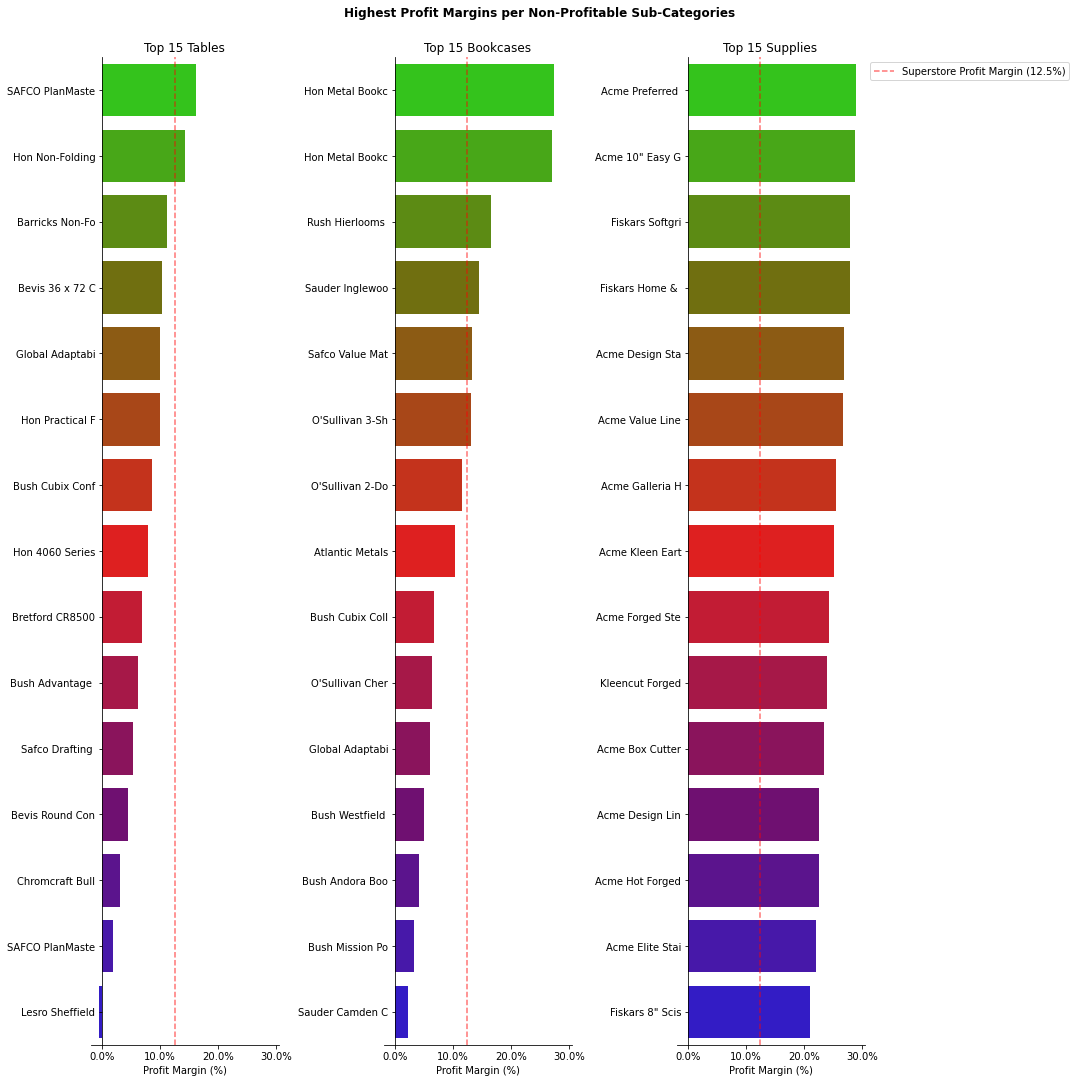

In [99]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15,15), ncols=3, sharex=True)

#Plotting the profit margin per sub-category.
sns.barplot(y=tables.index[:15], x=tables["profit_margin"][:15], ax=ax1,
           dodge=False, palette="brg_r")
sns.barplot(y=bookcases.index[:15], x=bookcases["profit_margin"][:15], ax=ax2,
           dodge=False, palette="brg_r")
sns.barplot(y=supplies.index[:15], x=supplies["profit_margin"][:15], ax=ax3,
           dodge=False, palette="brg_r")


def fix_labels(ax):
    """
    Function for fixing the y-axis tick labels
    """
    
    labels = [label.get_text()[:15] for label in ax.get_ymajorticklabels()]
    ax.set_yticklabels(labels)
    
    return ax

#Fixing the y-axis tick labels for all charts.
fix_labels(ax1)
fix_labels(ax2)
fix_labels(ax3)

def format_bars(ax):
    """
    Function for making the appearance of all the charts equal and cleaning bar junk
    """
    
    ax.spines[["top","right"]].set_visible(False)
    ax.spines["left"].set_position("zero")
    ax.set(ylabel=None, xlabel="Profit Margin (%)")
    
    ax.axvline(mean_profit, color="red", label="Superstore Profit Margin (12.5%)", alpha=0.55, ls="--")
    
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))
    
    return ax

#Formatting all the bars to have the same appearance
format_bars(ax1)
format_bars(ax2)
format_bars(ax3)

#Setting the titles for all charts.
ax1.set_title("Top 15 Tables")
ax2.set_title("Top 15 Bookcases")
ax3.set_title("Top 15 Supplies")

#Setting a joint-title for all charts.
fig.suptitle("Highest Profit Margins per Non-Profitable Sub-Categories", y=1, fontweight="bold")

#Setting the legend.
ax3.legend(bbox_to_anchor=(1,1))


fig.tight_layout()

The drop off in margins is quite big within Tables and Bookcases. Even the 15th highest margin item within Tables is actually being sold at a loss (out of 56 of it's items).

The chart also shows that Supplies actually have a very high margin on many of it's items. Yet, the sub-category as a whole is sold at a loss. An explanation for this is that the highest selling items (most revenue and impactful on category proft) are being sold at a loss, thus bringing the margin down for the entire sub-category.
This is easily provable with a simple extract from the dataframe.

In [100]:
#Converting to floats from scientific notation
supplies["profit"] = supplies["profit"].apply(lambda x: f"{x:.2f}")
supplies["profit_margin"] = supplies["profit_margin"].apply(lambda x: f"{x:.2f}")

supplies.sort_values(by="sales", ascending=False)[:5]

,postal_code,sales,quantity,discount,profit,profit_margin
product_name,,,,,,
High Speed Automatic Electric Letter Opener,266895.0,17030.312,11,0.2,-262.00,-0.02
Martin Yale Chadless Opener Electric Letter Opener,277104.0,16656.200,22,0.6,-1299.18,-0.08
Compact Automatic Electric Letter Opener,354385.0,2982.750,26,0.4,-57.27,-0.02
Premier Automatic Letter Opener,195746.0,2836.366,14,0.6,-427.86,-0.15
Premier Electric Letter Opener,405429.0,2641.608,24,0.6,-0.00,-0.00


As shown, the 5 highest selling items within Supplies are being sold at a negative margin. This in turn has brought down the profit margin for the entire sub-category.

#### 3. Segment Analysis

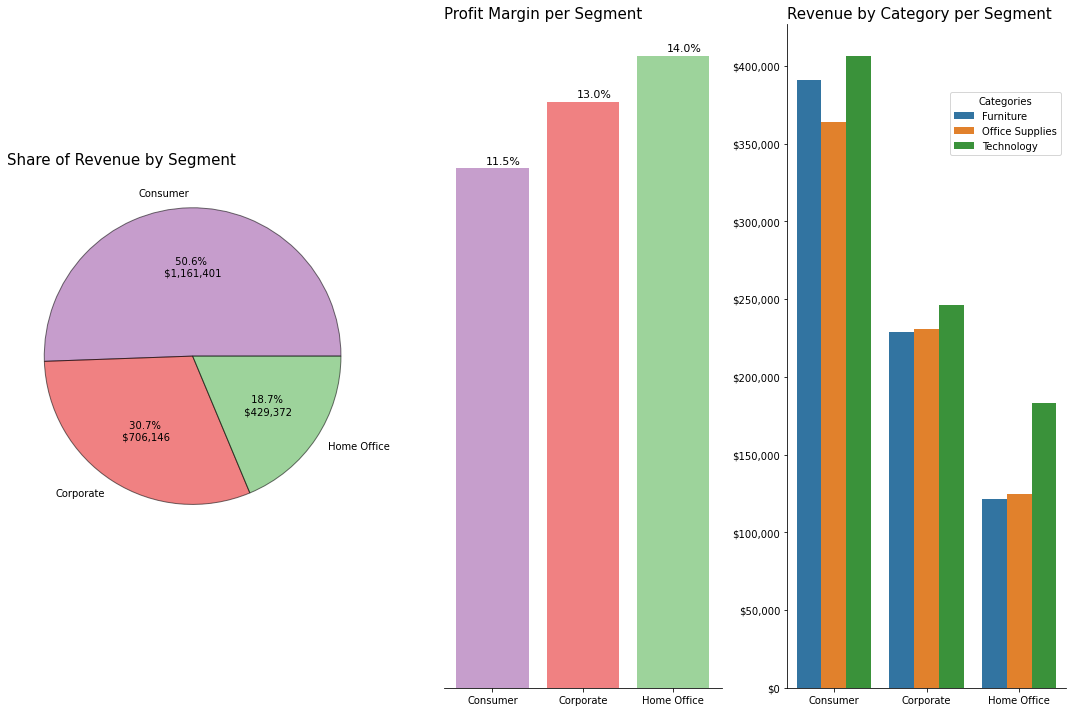

In [101]:
#Grouping by segment and summing the numerical cols.
sales_by_segment = df.groupby("segment").sum()

#Using this the same colors can be applied for the segments across different charts.
segment_colors = ["#984ea3" if label == "Consumer" else "#e41a1c" if label == "Corporate" else "#4daf4a" for label in sales_by_segment.index]

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15,10), ncols=3, gridspec_kw={"width_ratios": [1, 0.75, 0.75]})

#Pie chart with % share of revenue and annotating the actual sales value.
ax1.pie(sales_by_segment["sales"], labels=sales_by_segment.index,
       wedgeprops={"linewidth":1, "edgecolor":"black", "alpha":0.55}, colors=segment_colors,
      autopct=lambda p: f"{p: .1f}% \n ${p*np.sum(sales_by_segment['sales'])/100 :,.0f}")

#Setting the title for the pie chart
ax1.set_title("Share of Revenue by Segment", fontdict={"fontsize":15}, loc="left")

#Preparing the data for visualization in a bar chart.
sales_by_segment["profit_margin"] = sales_by_segment["profit"] / sales_by_segment["sales"]
sales_by_segment = sales_by_segment[["quantity", "profit", "profit_margin"]].reset_index()

#Visualizing the profit margin per segment and applying the same coloring as the as pie chart.
ax2.bar(x=sales_by_segment["segment"], height=sales_by_segment["profit_margin"],
           color=segment_colors, alpha=0.55)

#Removing bar junk
ax2.spines[["left", "top", "right"]].set_visible(False)
ax2.tick_params(left=None, labelleft=None)

#Annotating the bars.
for p in ax2.patches:
    x, _ = p.get_xy()
    
    ax2.annotate(f"{p.get_height()*100 :.1f}%", xy=(x+0.33, p.get_height()+0.001), size=11)

#Setting title for the bar chart.
ax2.set_title("Profit Margin per Segment", fontdict={"fontsize":15}, loc="left")

#Grouping by segment and category.
segment_and_category = df.groupby(["segment", "category"], as_index=False).sum()

#Plotting the sales per segment and using the category as hue to show the division of sales between the categories.
sns.barplot(x=segment_and_category["segment"], y=segment_and_category["sales"], hue=segment_and_category["category"], ax=ax3)

#Removing bar junk.
ax3.spines[["top", "right"]].set_visible(False)
ax3.set_title("Revenue by Category per Segment", fontdict={"fontsize":15}, loc="left")
ax3.set(xlabel=None, ylabel=None)

#Setting the format to USD on the y-axis.
ax3.yaxis.set_major_formatter("${x:,.0f}")

#Legend for the bar chart to show the segments in hue.
ax3.legend(title="Categories", loc="center right", bbox_to_anchor=(1, 0.85))

fig.tight_layout()

Looking at the segments for the Superstore it is apparent that the Consumer segment is contributing the most to sales.
The consumer segment has a bit lower profit margin than Corporate and Home Office. This is most likely explained by the high volume of sales it's doing in Furniture, which we saw before has the lowest profit margin out of all the categories of products.

Other than that, another insight is that most of the sales for each segment is within Technology, which on average has a high profit margin.

#### 4. Geographical Analysis

Text(0.5, 1.0, 'Revenue per State - Top 10')

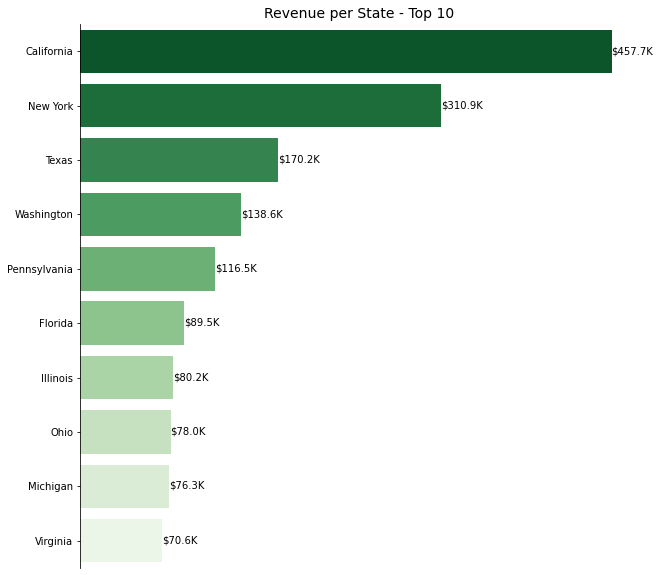

In [102]:
#Grouping the data on state and sorting it based on the sales the states are making
sales_by_state = df.groupby("state", as_index=False).sum().sort_values(by="sales", ascending=False)

#Calculating profit margin per state.
sales_by_state["profit_margin"] = sales_by_state["profit"] / sales_by_state["sales"]


fig, ax = plt.subplots(figsize=(10,10))

#Plotting the sales per state.
sns.barplot(x=sales_by_state["sales"][:10], y=sales_by_state["state"][:10],
           ax=ax, palette="Greens_r")

#Annotating the sales.
for p in ax.patches:
    _, y = p.get_xy()
    
    ax.annotate(f"${p.get_width() / 1000 :.1f}K", xy=(p.get_width(), y+0.45))
    
#Removing bar junk
ax.spines[["top", "right", "bottom"]].set_visible(False)
ax.set(ylabel=None, xlabel=None)
ax.tick_params(labelbottom=None, bottom=None)

#Setting the title
ax.set_title("Revenue per State - Top 10", fontdict={"fontsize":14})

The drop of in sales between states is quite large as California has 50% more sales than New York (2nd highest by sales) and New York has 80% more sales than Texas (3rd highest by sales).

This company is therefore reliant on keeping up the sales in these 3 geographical segments (out of all the 49 states they've been selling to).

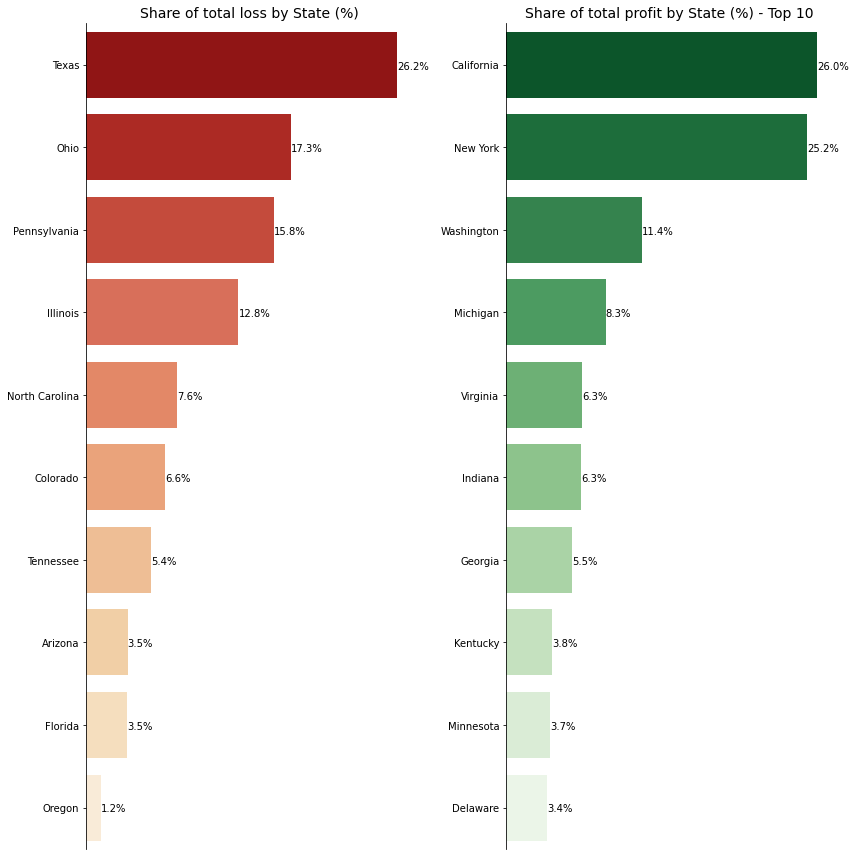

In [103]:
#Filtering to only show states that on aggregate are making a loss. Sorting with the lowest values.
no_profit_states = sales_by_state[sales_by_state["profit"] < 0].sort_values(by="profit")[:10]

#Getting each state's share of the total loss.
no_profit_states["share_of_loss"] = no_profit_states["profit"] / no_profit_states["profit"].sum()

#Filtering to only show states that on aggregate are making a profit. Sorting with the highest values first.
profitable_states = sales_by_state[sales_by_state["profit"] > 0].sort_values(by="profit", ascending=False)[:10]

#Getting each state's share of the total profit.
profitable_states["share_of_profit"] = profitable_states["profit"] / profitable_states["profit"].sum()

fig, (ax1, ax2) = plt.subplots(figsize=(12, 12), ncols=2)

#Plotting the states where Superstore is making a loss.
sns.barplot(x=no_profit_states["share_of_loss"], y=no_profit_states["state"], 
            ax=ax1, palette="OrRd_r")

#Plotting the states where Superstore is making a profit
sns.barplot(x=profitable_states["share_of_profit"], y=profitable_states["state"],
           ax=ax2, palette="Greens_r")


def clean_hbar(ax):
    """
    Function to clean out bar junk for the provided bar charts
    """
    
    ax.spines[["bottom" ,"top", "right"]].set_visible(False)
    ax.set(ylabel=None, xlabel=None)
    ax.tick_params(bottom=False, labelbottom=False)
    
    return ax

def annotate_hbar(ax):
    """
    Function to annotate the % share of profit/loss on the provided bar charts"""
    
    for p in ax.patches:
        _, y = p.get_xy()
        ax.annotate(f"{p.get_width()*100 :.1f}%", xy=(p.get_width(), y+0.45))
    
    return ax

#Calling the function on the two charts.
annotate_hbar(ax1)
annotate_hbar(ax2)
    
#Calling the function on the two charts.
clean_hbar(ax1)
clean_hbar(ax2)
    
#Setting the title for the two charts.
ax1.set_title("Share of total loss by State (%)", fontdict={"fontsize":14})
ax2.set_title("Share of total profit by State (%) - Top 10", fontdict={"fontsize":14})

fig.tight_layout()

An important finding here is that some of the states where this company is making most of their sales is actually bringing down the profit that this company is making.

Texas for instace, which is their 3rd highest segment in terms of sales, is actually contributing to more than 1/4 of the loss that the company is making on it's sales.

5. Conclusion - Actionable Insights 


Based on the initial purpose with this analysis we helped the Superstore identify:

-Technology and Home Office have on average a high profit margin, while Furniture are being sold at low margin or even at a loss for some it's sub-categories.
-The Consumer segment is driving most of the Superstore's sales and across all segments Technology is contributing the most to revenue.
-Over 50% of their profit is being made in California and New York. This makes this store quite geographically dependent on keeping up their sales here.

Their sales in Texas (which is their 3rd highest state in sales) is on aggregate making a loss.

Based on this, some actions that the Superstore can take is for instance:

    1.Stop selling to certain states where they on aggregate are making a loss.
    The loss can be attributed to the types of items that are being sold to the customers in this state or that shipment costs to certain areas are driving their profits down.
    2.Stop selling non-profitable products
    Ideally a customer basket analysis would be made before this is done. A customer basket analysis would check if low or non-profit items are part of customer baskets that on aggregate are making a profit.
   
Let's do a simplified customer basket analysis for this dataset!
As we saw before, Tables and Bookcases are as aggregate product categories being sold at a loss.
The question at hand for this visualization would therefore be: If superstore removed Tabled and Bookcases entirely, what would the effect be on their profit
   